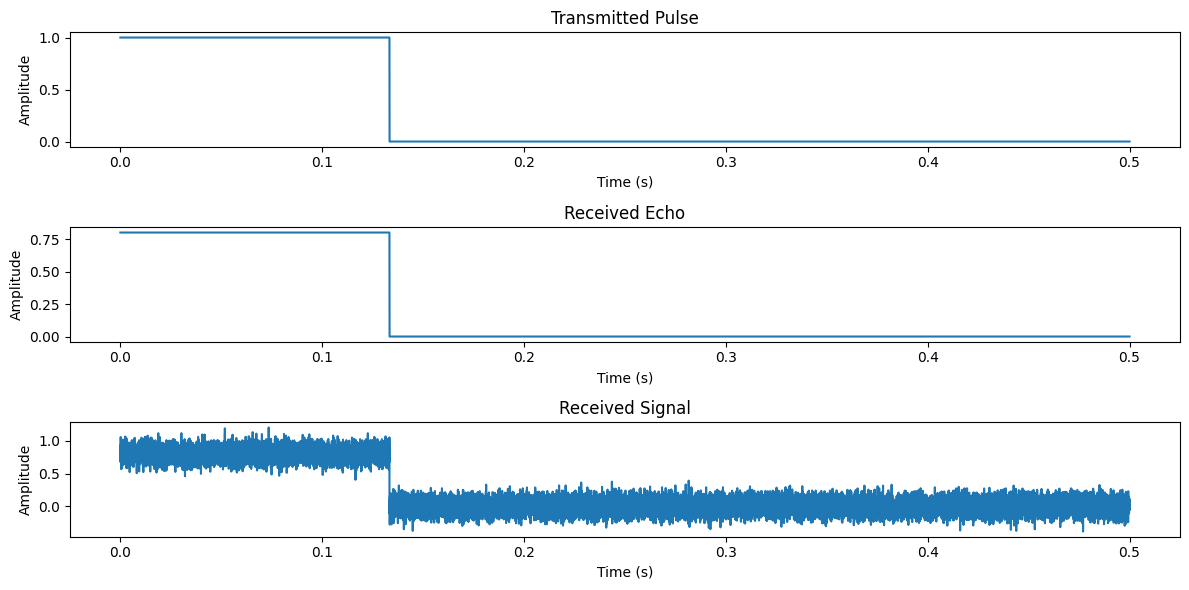

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
SOUND_SPEED = 1500  # m/s
SAMPLE_RATE = 48000  # samples per second
DURATION = 0.5  # seconds
AMBIENT_NOISE_LEVEL = 0.1

def simulate_echo_location(target_depth, target_distance):
    # Calculate the time it takes for the sound to travel to the target and back
    time = 2 * target_depth / SOUND_SPEED

    # Calculate the number of samples needed for the given time
    num_samples = int(SAMPLE_RATE * DURATION)

    # Create a time array
    t = np.linspace(0, DURATION, num_samples)

    # Generate the transmitted pulse
    transmitted_pulse = np.zeros(num_samples)
    transmitted_pulse[:int(time * SAMPLE_RATE)] = 1

    # Generate the received echo by convolving the transmitted pulse with the reflection coefficient
    reflection_coefficient = 0.8  # Assuming 80% reflection coefficient
    received_echo = np.convolve(transmitted_pulse, [reflection_coefficient])

    # Generate the ambient noise
    ambient_noise = np.random.normal(0, AMBIENT_NOISE_LEVEL, num_samples)

    # Add the received echo and ambient noise
    received_signal = received_echo + ambient_noise

    # Plot the transmitted pulse, received echo, and received signal
    plt.figure(figsize=(12, 6))
    plt.subplot(3, 1, 1)
    plt.plot(t, transmitted_pulse)
    plt.title('Transmitted Pulse')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')

    plt.subplot(3, 1, 2)
    plt.plot(t, received_echo[:num_samples])
    plt.title('Received Echo')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')

    plt.subplot(3, 1, 3)
    plt.plot(t, received_signal)
    plt.title('Received Signal')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')

    plt.tight_layout()
    plt.show()

# Run the simulation
target_depth = 100  # meters
target_distance = 200  # meters
simulate_echo_location(target_depth, target_distance)
